In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
!python ../YOLO_Full/yolov5/detect.py --weights runs/train/exp/weights/best.pt --source ./result.mp4

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

### YOLOV5 dengan gambar

In [7]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

img = os.path.join('gerobak.jpeg')
results = model(img)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,724.989807,406.554199,811.751404,489.568604,0.293718,0,Gerobak


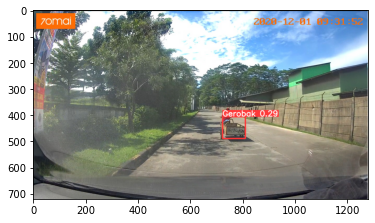

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

### YOLOV5 real time

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()